<a href="https://colab.research.google.com/github/BharatXBhalla/Data-Analytics-CDAC/blob/main/Inferential_stats/11_Central_Limit_Theorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Generating Random sample data in Normal Distribustion form

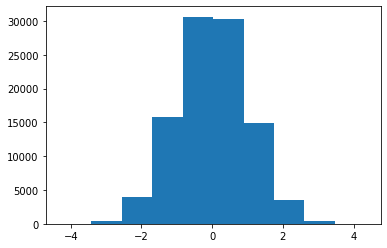

In [3]:
sample_data = np.random.normal(size=100000)  
plt.hist(sample_data)
plt.show()  #to plot histogram without axis



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


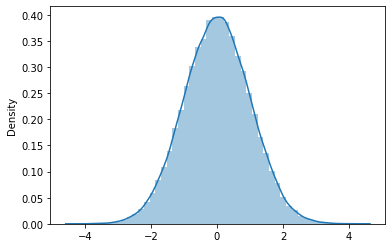

In [4]:
sns.distplot(sample_data)

# Uniform Dist sample data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


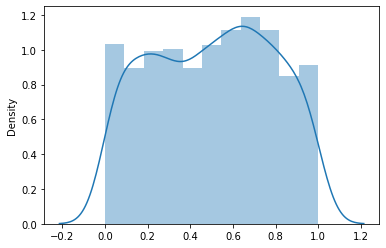

In [5]:
sample_data = np.random.uniform(size=1000)
sns.distplot(sample_data)

## Combining Two Possion Distributions 

In [6]:
from scipy.stats import poisson

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


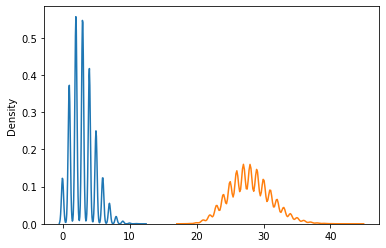

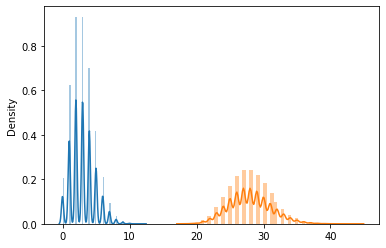

In [7]:
population_ages1 =poisson.rvs(loc=0, mu=3, size=150000)  # 
population_ages2 =poisson.rvs(loc=18, mu=10, size=100000)  #

sns.kdeplot(population_ages1)
sns.kdeplot(population_ages2)

plt.figure()
sns.distplot(population_ages1)
sns.distplot(population_ages2)

In [8]:
population_ages = np.concatenate((population_ages1, population_ages2))  # concat

population_ages.mean() # what is the true mean age of the population of 250000  people?

12.997524

In [9]:
np.random.seed(6)
sample_ages = np.random.choice(a=population_ages, size=500) # Sample 500 values

sample_ages.mean() # Show sample mean     point estimate

13.366

In [10]:
population_ages.mean() - sample_ages.mean()

-0.36847599999999936

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


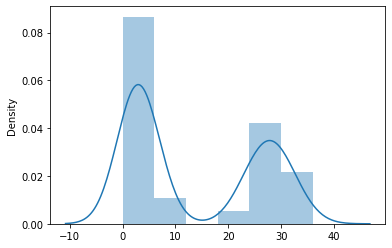

In [11]:
sns.distplot(sample_ages)

create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


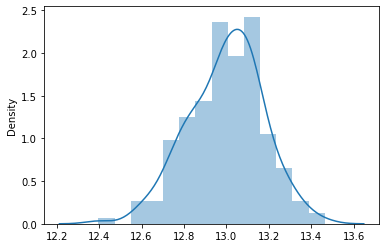

In [12]:
np.random.seed(10)     #CLT THEOREM 

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=5000)
    point_estimates.append( sample.mean() )         # collecting the sample mean for every sample in a max generation of 200 samples
    
sns.distplot(np.array(point_estimates))

In [13]:
#The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. 
#In addition, the mean of the sampling distribution approaches the true population mean

population_ages.mean() - np.array(point_estimates).mean()


0.0010259999999995273

## Confidence Interval

In [14]:
sampling_distribution_mean = np.array(point_estimates)

In [15]:
sample_mean = sampling_distribution_mean.mean()

In [16]:
import scipy.stats as stats
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*     #  area under curve  -----ppf   # con level  95%------1.96 (1-0.5/2)

print("z-critical value:")              # Check the z-critical value
print(z_critical)   

z-critical value:
1.959963984540054


In [17]:
pop_stdev = sampling_distribution_mean.std()

In [18]:
margin_of_error = z_critical * (pop_stdev/math.sqrt(len(sampling_distribution_mean )))     

In [19]:
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)     #X-MG     ,X+MG 

print("Confidence interval:")
print(confidence_interval)

Confidence interval:
(12.972000850719514, 13.020995149280488)


In [20]:
sample_mean #with Confidence Level of 95%

12.996498

# T-distribution

In [21]:
#SD is unknown
sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size) #
sample_mean = sample.mean()

In [22]:
t_critical = stats.t.ppf(q = 0.975,df=24)

In [23]:
print("t-critical value:")                  # Check the t-critical value
print(t_critical)    

t-critical value:
2.0638985616280205


In [24]:
sample_stdev = sample.std()    # Get the sample standard deviation
sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate     MG= t*SIGMA/SQ(N)
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

Confidence interval:
(5.634128277895855, 15.485871722104147)


In [25]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(5.634128277895855, 15.485871722104147)

Confidence interval using Proportions

In [26]:

#hispanic proportion estimate:                                      #z dist or normal dist
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.192                               # Point estimate of sample proportion

n = 1000                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  p + margin_of_error) 

confidence_interval

(0.16758794241348748, 0.21641205758651252)

In [27]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.192,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.16758794241348748, 0.21641205758651252)